In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
loaded = np.loadtxt("processed_data.txt", skiprows=1)
t = loaded[:,0]
y = loaded[:,1]

popt = np.loadtxt("best_fit_params.txt")
sigma_meas = 0.25

In [3]:
def tide_model(t, A0, A1, phi1, P1, A2, phi2, P2):
    return (A0
            + A1*np.cos(2*np.pi*t/P1 + phi1)
            + A2*np.cos(2*np.pi*t/P2 + phi2))

In [4]:
y_model = tide_model(t, *popt)
resid = y - y_model
resid_std = np.std(resid, ddof=1)

print("Residual Std Dev:", resid_std)

Residual Std Dev: 1.2119398949100841


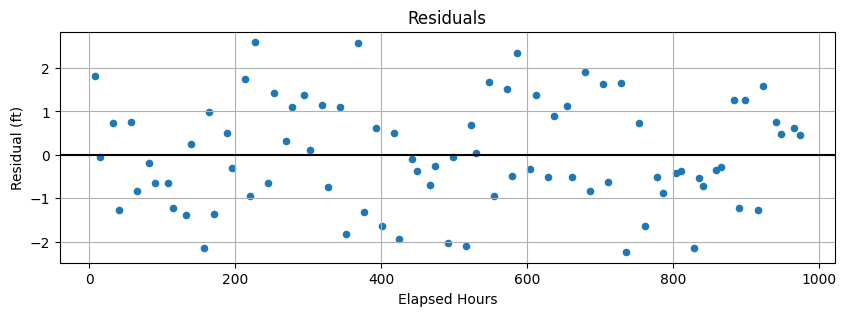

In [5]:
plt.figure(figsize=(10,3))
plt.scatter(t, resid, s=20)
plt.axhline(0, color='k')
plt.xlabel("Elapsed Hours")
plt.ylabel("Residual (ft)")
plt.title("Residuals")
plt.grid(True)
plt.savefig("residuals_vs_time.pdf")
plt.show()

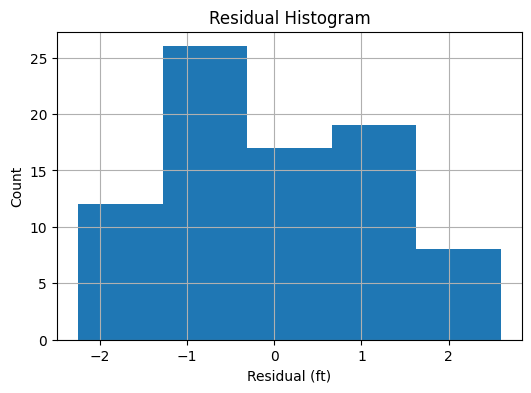

In [6]:
q25, q75 = np.percentile(resid, [25,75])
iqr = q75 - q25
n = len(resid)

bin_width = 2 * iqr / (n ** (1/3))
bins = int((resid.max() - resid.min()) / bin_width)

plt.figure(figsize=(6,4))
plt.hist(resid, bins=bins)
plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.title("Residual Histogram")
plt.grid(True)
plt.savefig("residuals_hist.pdf")
plt.show()

In [7]:
sigma_intrinsic = max(0, np.sqrt(resid_std**2 - sigma_meas**2))
print("Intrinsic scatter:", sigma_intrinsic)

Intrinsic scatter: 1.1858744911982322


In [9]:
np.savetxt("residuals.txt", resid)